# Exploratory Data Analysis

## What we expect from this notebook.

This notebook will conduct a comprehensive exploratory data analysis (EDA) to gain a thorough understanding of the data prior to the modeling stage. During the EDA, the presence of outliers will be examined and a determination will be made regarding how to handle them.

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import folium
from folium.plugins import MarkerCluster

In [2]:
df = pd.read_csv('../data/processed/clean_kelowna_housing_data.csv')

In [3]:
df

,name,price,address,Type,nbeds,nbath,laundry,heating,parking,air_conditioner,furnished,animal_friendly,Area,lat,lng,Walk Score,Bike Score,Transit Score
0,3 beds 3 baths townhouse,3300,"kelowna, bc, v1y 5t5",Townhouse,3,3,in-unit laundry,gas heating,garage parking,central ac,unfurnished,No pets,1371,49.87816,-119.47675,54,96,56
1,2 beds 1 bath house,2000,"west kelowna, bc, v4t",House,2,1,in-unit laundry,Not specified,Not specified,Not specified,Not specified,dog and cat friendly,914,49.83173,-119.62367,43,49,-1
2,private room for rent,570,"west kelowna, bc, v4t",Room,1,1,in-unit laundry,gas heating,Not specified,ac available,unfurnished,cat friendly,150,49.83173,-119.62367,43,49,-1
3,3 beds 2 baths townhouse,2900,"west kelowna, bc, v4t",Townhouse,3,2,in-unit laundry,central heating,garage parking,central ac,Not specified,dog and cat friendly,1371,49.83173,-119.62367,43,49,-1
4,4 beds 2 5 baths house,3800,"west kelowna, bc, v4t",House,4,2,in-unit laundry,Not specified,garage parking,Not specified,unfurnished,No pets,2500,49.83173,-119.62367,43,49,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,1 bed 1 bath house,950,"kelowna, bc, v1y 2r7",House,1,1,in-unit laundry,central heating,street parking,central ac,Not specified,No pets,1200,49.86395,-119.48816,75,97,48
1259,private room for rent,1100,"penticton, bc, v2a 8t7",Room,1,1,Not specified,Not specified,Not specified,Not specified,furnished,dog and cat friendly,150,49.53912,-119.56932,0,28,-1
1260,shared senior living,1100,"west kelowna, bc, v4t 1v3",Room,1,1,in-unit laundry,gas heating,street parking,central ac,furnished,No pets,150,49.84618,-119.60449,14,24,-1
1261,2 beds 1 bath house,2800,"kelowna, bc, v1v 2n2",House,2,1,in-unit laundry,gas heating,street parking,Not specified,unfurnished,No pets,1200,49.90500,-119.46058,15,52,37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263 entries, 0 to 1262
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1263 non-null   object 
 1   price            1263 non-null   int64  
 2   address          1263 non-null   object 
 3   Type             1263 non-null   object 
 4   nbeds            1263 non-null   int64  
 5   nbath            1263 non-null   int64  
 6   laundry          1263 non-null   object 
 7   heating          1263 non-null   object 
 8   parking          1263 non-null   object 
 9   air_conditioner  1263 non-null   object 
 10  furnished        1263 non-null   object 
 11  animal_friendly  1263 non-null   object 
 12  Area             1263 non-null   int64  
 13  lat              1263 non-null   float64
 14  lng              1263 non-null   float64
 15  Walk Score       1263 non-null   int64  
 16  Bike Score       1263 non-null   int64  
 17  Transit Score 

In [5]:
df.describe(include = [object]).T

,count,unique,top,freq
name,1263,267,1 bed 1 bath house,159
address,1263,491,"kelowna, bc",305
Type,1263,4,House,584
laundry,1263,4,in-unit laundry,710
heating,1263,6,central heating,430
parking,1263,4,parking available,382
air_conditioner,1263,3,central ac,513
furnished,1263,3,unfurnished,811
animal_friendly,1263,4,No pets,950


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1263.0,1942.052257,1251.180778,450.00000,1000.000000,1800.00000,2500.000000,12785.00000
nbeds,1263.0,1.844022,1.015050,1.00000,1.000000,2.00000,2.000000,7.00000
nbath,1263.0,1.391924,0.680844,0.00000,1.000000,1.00000,2.000000,6.00000
Area,1263.0,1018.749802,669.521022,80.00000,800.000000,1100.00000,1200.000000,7000.00000
lat,1263.0,49.887961,0.163641,49.29241,49.859965,49.88698,49.897785,50.38468
lng,1263.0,-119.472305,0.136495,-120.14867,-119.496910,-119.49661,-119.411090,-118.61706
Walk Score,1263.0,41.587490,27.241423,0.00000,13.000000,46.00000,64.000000,98.00000
Bike Score,1263.0,63.200317,33.513773,-1.00000,28.000000,74.00000,98.000000,99.00000
Transit Score,1263.0,33.053840,25.105677,-1.00000,-1.000000,42.00000,59.000000,60.00000


In [7]:
len(df[df['Transit Score'] == -1])

373

Transit Score have a lot of missing values (-1). Therefore, I decided to completely delete this column.

In [8]:
df = df.drop(columns={'Transit Score'})

## Which type of rental properties (e.g. apartment, townhouse, etc.) are most common in the dataset?


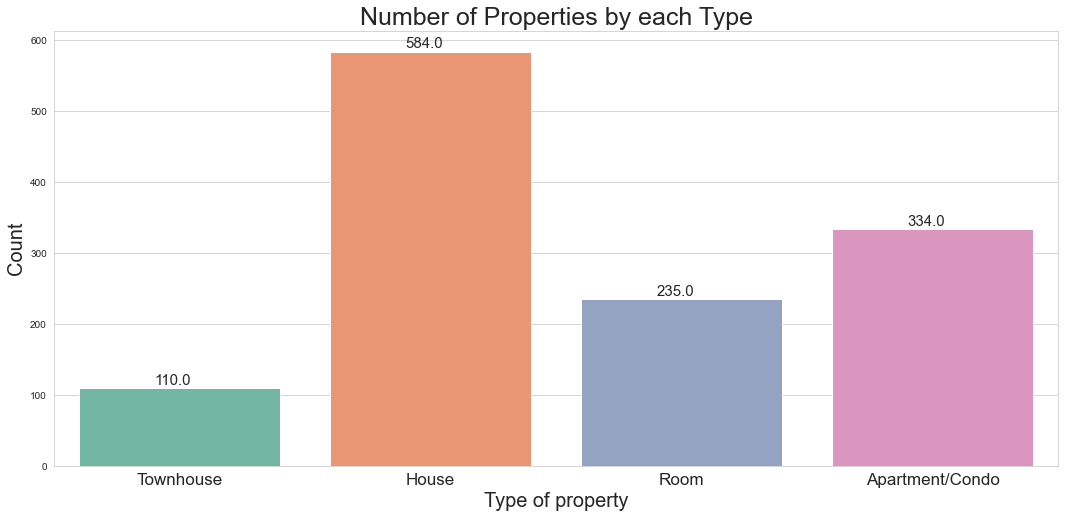

In [9]:
plt.figure(figsize=(18, 8))
ax = sns.countplot(data=df, x='Type', palette='Set2')

# set the labels and title
ax.set_xlabel('Type of property', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Number of Properties by each Type', fontsize=25)

# rotate the x-axis labels to improve readability and make them larger
plt.xticks(fontsize=17)

# add count labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 5), fontsize=15)

# display the plot
plt.show()

As I expected, there are more houses than apartments, which is not surprising given that Kelowna is a small city. Therefore, it is reasonable to expect a lower number of apartments compared to houses in this area.

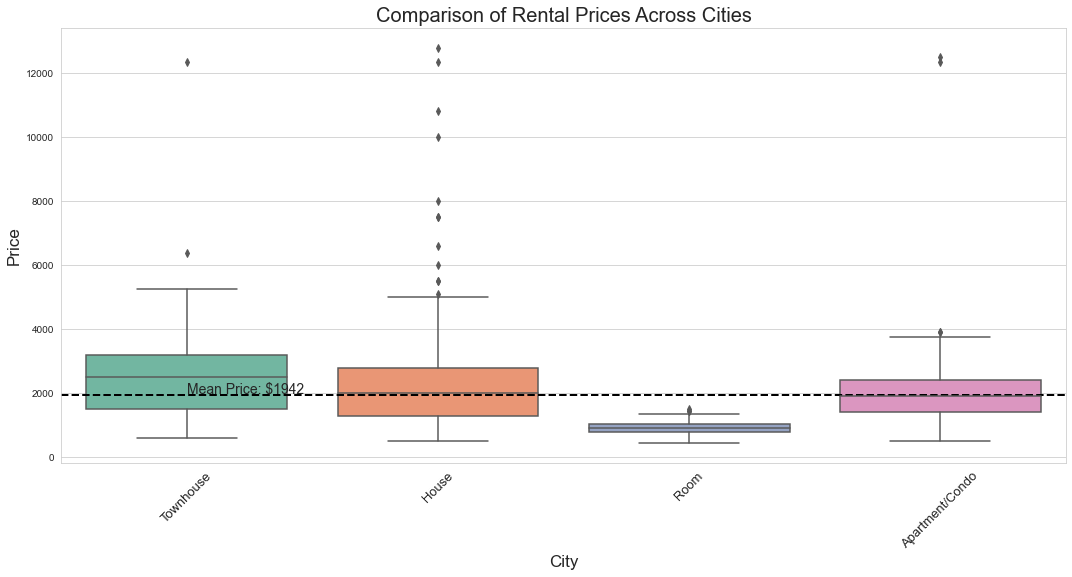

In [10]:
# create a box plot of the city and price columns
plt.figure(figsize=(18, 8))
ax = sns.boxplot(data=df, x='Type', y='price', palette='Set2')

# set the labels and title
ax.set_xlabel('City', fontsize=17)
ax.set_ylabel('Price', fontsize=17)
ax.set_title('Comparison of Rental Prices Across Cities', fontsize=20)

# add the average price as a horizontal line
mean_price = df['price'].mean()
ax.axhline(y=mean_price, color='black', linestyle='--', linewidth=2)
ax.text(0, mean_price + 50, f'Mean Price: ${mean_price:.0f}', fontsize=14)

# rotate the x-axis labels to improve readability
plt.xticks(rotation=45, fontsize=13)

# display the plot
plt.show()

Based on the box plots, it can be observed that the average price of townhouses is higher than the average price of other property types. Additionally, while the average prices of apartments and houses are similar, their quartiles are different, with houses having higher values. The plot highlights that the "Room" property type has a significantly lower price than other property types, which further reinforces the importance of considering the type of property when analyzing real estate data. It appears that there are numerous outliers present in the data that could negatively impact the quality of predictions. As a result, it has been decided to completely remove these outliers from the dataset at this stage.

In [11]:
grouped = df.groupby('Type')
# Group the df by 'Type' column, so I can check for IQR in all types

q1 = grouped["price"].transform(lambda x: x.quantile(0.25))
q3 = grouped["price"].transform(lambda x: x.quantile(0.75))

iqr = q3 - q1

upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)
# Calculate the upper and lower bounds using the interquartile range

outliers = df[df["price"].gt(upper_bound) | df["price"].lt(lower_bound)]

outliers
# print all outliers

,name,price,address,Type,nbeds,nbath,laundry,heating,parking,air_conditioner,furnished,animal_friendly,Area,lat,lng,Walk Score,Bike Score
59,6 beds 2 baths house,7500,"west kelowna, bc",House,6,2,in-unit laundry,central heating,garage parking,central ac,Not specified,No pets,1200,49.85902,-119.58413,6,23
89,6 beds 6 baths house,8000,"west kelowna, bc",House,6,6,in-unit laundry,electric heating,street parking,ac available,unfurnished,No pets,5800,49.85902,-119.58413,6,23
286,4 beds 4 5 baths townhouse,6360,"kelowna, bc",Townhouse,4,4,Not specified,Not specified,Not specified,Not specified,Not specified,No pets,2016,49.88698,-119.49661,64,98
423,7 beds 3 baths house,6000,"kelowna, bc, v1x 2j5",House,7,3,in-unit laundry,heating available,parking available,ac available,Not specified,No pets,3200,49.89529,-119.39641,51,83
452,4 beds 4 baths house,10800,"kelowna, bc, v1y",House,4,4,in-unit laundry,central heating,garage parking,central ac,unfurnished,No pets,3300,49.88698,-119.49661,64,98
711,4 beds 3 baths house,5500,"kelowna, bc, v1p 1a1",House,4,3,laundry in building,central heating,garage parking,central ac,Not specified,dog and cat friendly,2928,49.88056,-119.36212,14,14
802,private room for rent,1450,"kelowna, bc, v1y 5n7",Room,1,1,in-unit laundry,gas heating,street parking,central ac,unfurnished,No pets,150,49.87628,-119.48731,52,92
803,private room for rent,1450,"kelowna, bc, v1y 5n7",Room,1,1,in-unit laundry,Not specified,Not specified,central ac,unfurnished,dog and cat friendly,150,49.87628,-119.48731,52,92
819,4 beds 3 baths house,6600,"west kelowna, bc, v1z 4b7",House,4,3,in-unit laundry,central heating,garage parking,central ac,Not specified,No pets,4000,49.88363,-119.54893,0,6
840,furnished 2 bedroom apt,1500,"peachland, bc",Room,1,1,Not specified,Not specified,Not specified,Not specified,Not specified,No pets,150,49.77387,-119.73592,32,60


In [12]:
df = df.drop(outliers.index)

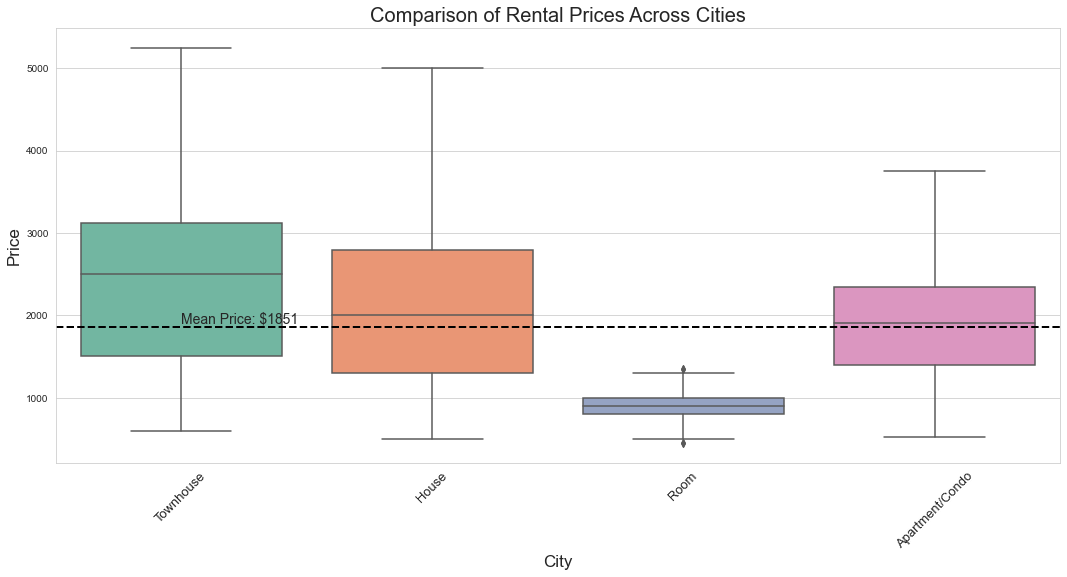

In [13]:
# create a box plot of the city and price columns
plt.figure(figsize=(18, 8))
ax = sns.boxplot(data=df, x='Type', y='price', palette='Set2')

# set the labels and title
ax.set_xlabel('City', fontsize=17)
ax.set_ylabel('Price', fontsize=17)
ax.set_title('Comparison of Rental Prices Across Cities', fontsize=20)

# add the average price as a horizontal line
mean_price = df['price'].mean()
ax.axhline(y=mean_price, color='black', linestyle='--', linewidth=2)
ax.text(0, mean_price + 50, f'Mean Price: ${mean_price:.0f}', fontsize=14)

# rotate the x-axis labels to improve readability
plt.xticks(rotation=45, fontsize=13)

# display the plot
plt.show()

After removing the outliers, it becomes more evident that the price for houses is significantly higher than the average price for apartments. The rest of our observations remain the same.

# What is the number of properties in each city?

In [14]:
df['city'] = df['address'].str.split(',').str[0]

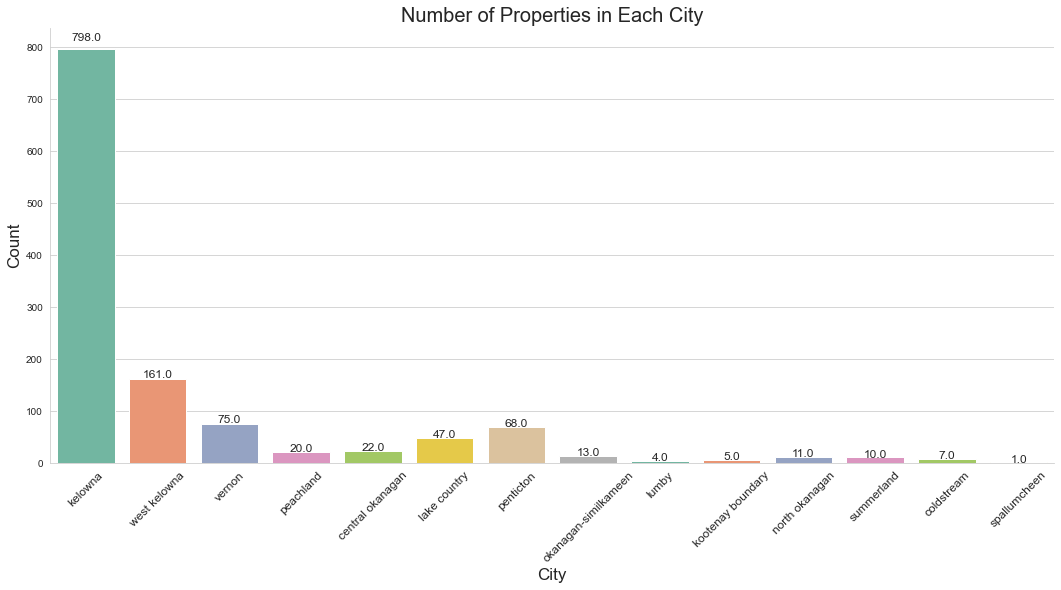

In [15]:
plt.figure(figsize=(18, 8))
ax = sns.countplot(data=df, x='city', palette='Set2')

# set the labels and title
ax.set_xlabel('City', fontsize=17)
ax.set_ylabel('Count', fontsize=17)
ax.set_title('Number of Properties in Each City', fontsize=20)

# rotate the x-axis labels to improve readability and make them larger
plt.xticks(rotation=45, fontsize=12)

# add count labels to the bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center', fontsize=12)

# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# display the plot
plt.show()

The plot indicates that there are only a few cities with fewer than 15 properties, and these cities may have an impact on the accuracy of predictions, particularly for high-priced ski resort cities.

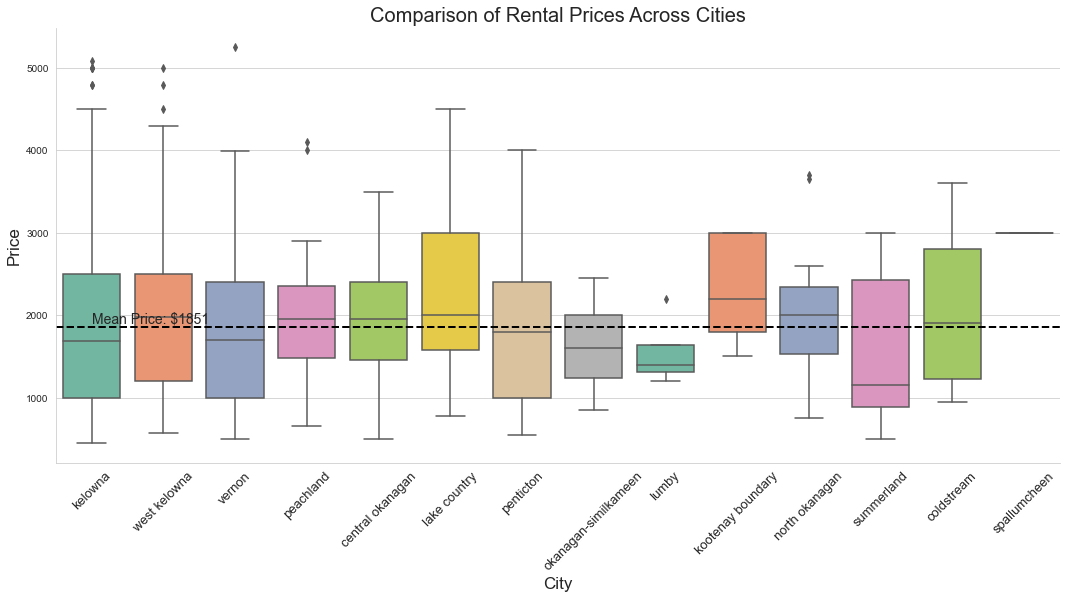

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a box plot of the city and price columns
plt.figure(figsize=(18, 8))
ax = sns.boxplot(data=df, x='city', y='price', palette='Set2')

# set the labels and title
ax.set_xlabel('City', fontsize=17)
ax.set_ylabel('Price', fontsize=17)
ax.set_title('Comparison of Rental Prices Across Cities', fontsize=20)

# add the average price as a horizontal line
mean_price = df['price'].mean()
ax.axhline(y=mean_price, color='black', linestyle='--', linewidth=2)
ax.text(0, mean_price + 50, f'Mean Price: ${mean_price:.0f}', fontsize=14)

# rotate the x-axis labels to improve readability
plt.xticks(rotation=45, fontsize=13)

# display the plot
sns.despine()
plt.show()

This plot reveals that the average price in Kootenay Boundary is significantly higher than the overall average price. This may be attributed to the fact that Kootenay Boundary is located near Big White resort, which is a popular ski destination.

## Distribution of price

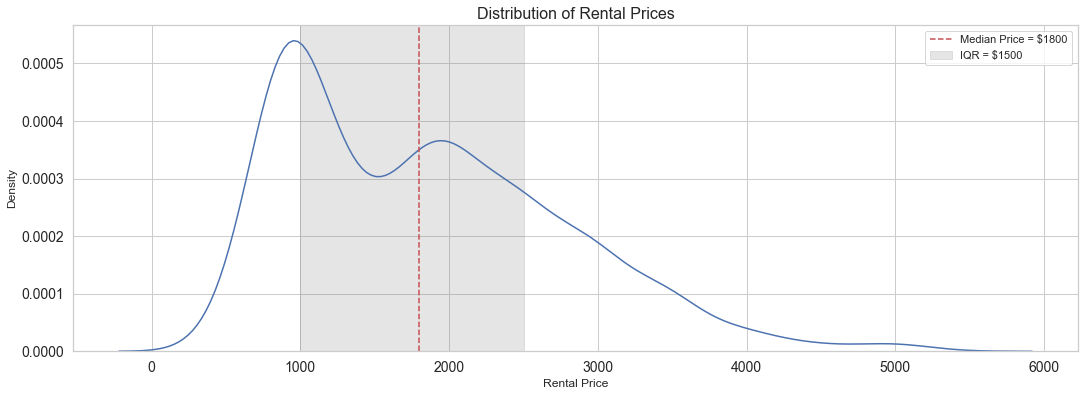

In [45]:
plt.figure(figsize=(18, 6))
sns.set(style="whitegrid")

# Plot the kernel density estimate of the rental price distribution
ax = sns.kdeplot(data=df, x="price")

# Set axis labels and title
ax.set(xlabel='Rental Price', ylabel='Density', title='Distribution of Rental Prices')

# Increase font size of axis labels and title
ax.tick_params(axis='both', labelsize=14)
ax.set_title(ax.get_title(), fontsize=16)

# Add vertical line to show median rental price
median_price = df["price"].median()
ax.axvline(median_price, color='r', linestyle='--', label=f"Median Price = ${median_price:.0f}")

# Add shaded region to show interquartile range
q1, q3 = df["price"].quantile([0.25, 0.75])
iqr = q3 - q1
ax.axvspan(q1, q3, alpha=0.2, color='gray', label=f"IQR = ${iqr:.0f}")

# Add legend
ax.legend()
plt.show()

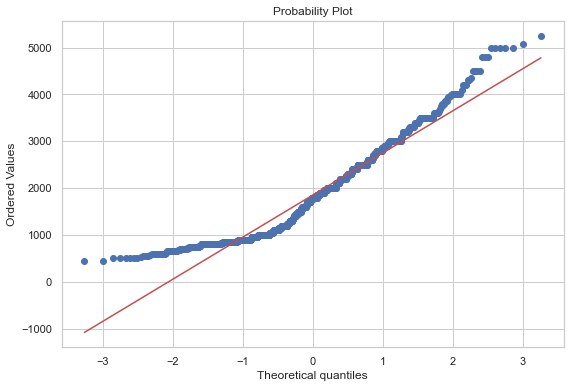

In [18]:
plt.figure(figsize=(9, 6))
sns.set(style="whitegrid")
ax = stats.probplot(df['price'], plot=plt)

Based on this plots, it appears that the price variable is not normally distributed, but instead is right-skewed and bimodal. While most machine learning models can still work with non-normal distributions, the price column will be transformed in a subsequent step to achieve a more normal distribution.

# Distribution of Area

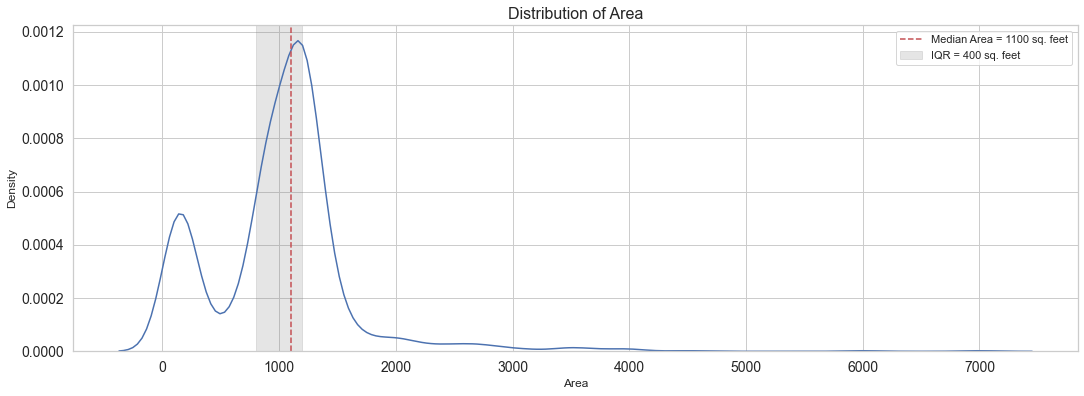

In [19]:
plt.figure(figsize=(18, 6))
sns.set(style="whitegrid")

# Plot the kernel density estimate of the rental price distribution
ax = sns.kdeplot(data=df, x="Area")

# Set axis labels and title
ax.set(xlabel='Area', ylabel='Density', title='Distribution of Area')

# Increase font size of axis labels and title
ax.tick_params(axis='both', labelsize=14)
ax.set_title(ax.get_title(), fontsize=16)

# Add vertical line to show median rental price
median_price = df["Area"].median()
ax.axvline(median_price, color='r', linestyle='--', label=f"Median Area = {median_price:.0f} sq. feet")

# Add shaded region to show interquartile range
q1, q3 = df["Area"].quantile([0.25, 0.75])
iqr = q3 - q1
ax.axvspan(q1, q3, alpha=0.2, color='gray', label=f"IQR = {iqr:.0f} sq. feet")

# Add legend
ax.legend()
plt.show()

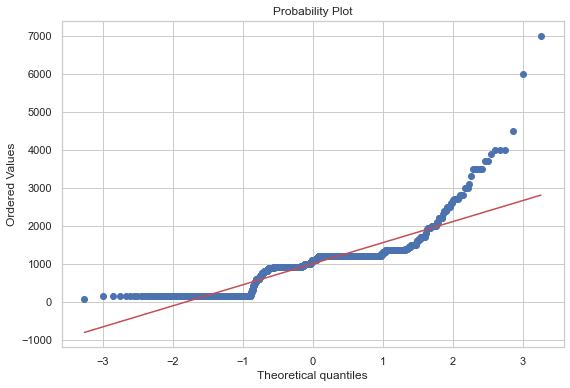

In [20]:
plt.figure(figsize=(9, 6))
sns.set(style="whitegrid")
ax = stats.probplot(df['Area'], plot=plt)

Furthermore, it can be observed from this plot that the Area variable is also not normally distributed. This may be due to the correlation between Rooms and lower prices and smaller areas.

## Impact of Bedrooms and Bathrooms on Property Price

This section explores the relationship between the number of bedrooms and bathrooms and their impact on the price of a property.

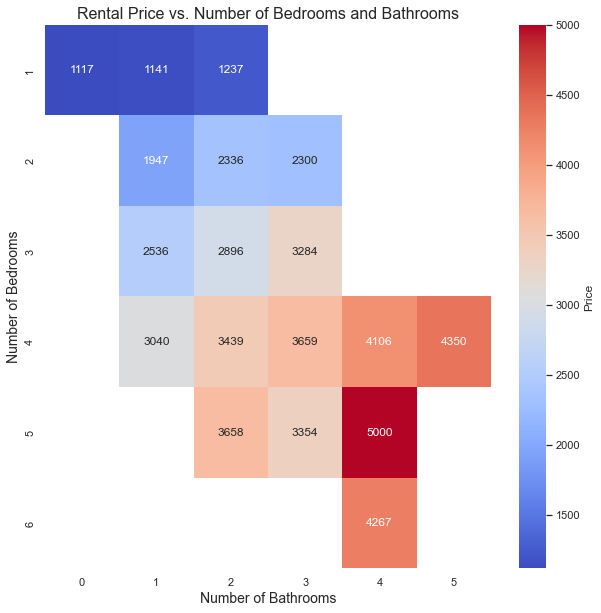

In [21]:
# create a heat map of rental prices based on number of bedrooms and bathrooms
fig, ax = plt.subplots(figsize=(10, 10))
pivot_table = df.pivot_table(index='nbeds', columns='nbath', values='price', aggfunc='mean')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.0f', cbar_kws={'label': 'Price'})
ax.set_xlabel('Number of Bathrooms', fontsize=14)
ax.set_ylabel('Number of Bedrooms', fontsize=14)
ax.set_title('Rental Price vs. Number of Bedrooms and Bathrooms', fontsize=16)
plt.show()

This plot displays the relationship between the number of bathrooms and bedrooms and how their variations impact the price of a property.

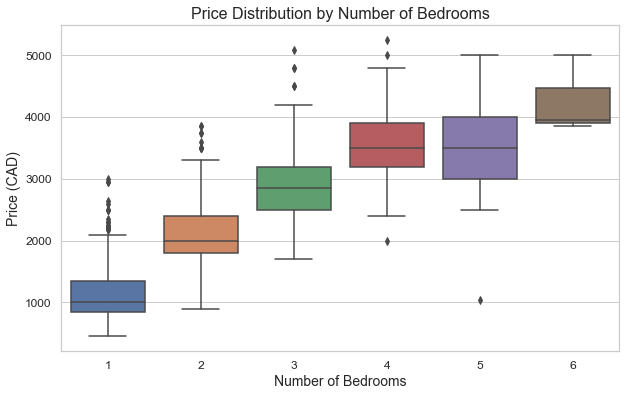

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='nbeds', y='price')

# set the labels and title
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Price (CAD)', fontsize=14)
plt.title('Price Distribution by Number of Bedrooms', fontsize=16)

# customize the tick labels and legend


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# display the plot
plt.show()

This plot illustrates how the price of a property increases as the number of bedrooms increases. Additionally, the presence of outliers is noticeable, and a plan will be developed later to address them.

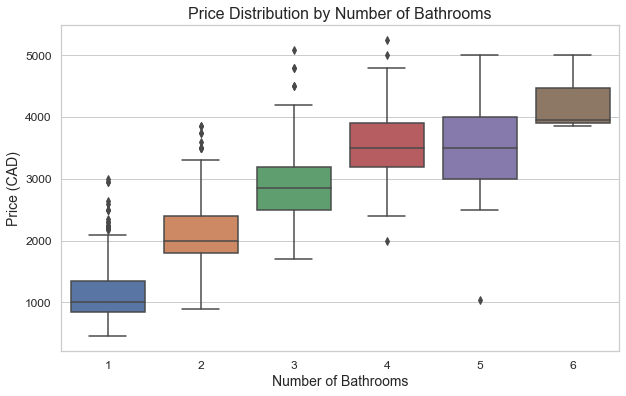

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='nbeds', y='price')

# set the labels and title
plt.xlabel('Number of Bathrooms', fontsize=14)
plt.ylabel('Price (CAD)', fontsize=14)
plt.title('Price Distribution by Number of Bathrooms', fontsize=16)

# customize the tick labels and legend
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# display the plot
plt.show()

Here is the same plot but for number of baths.

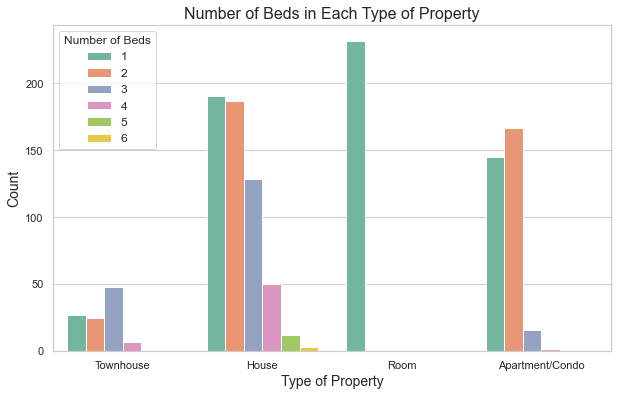

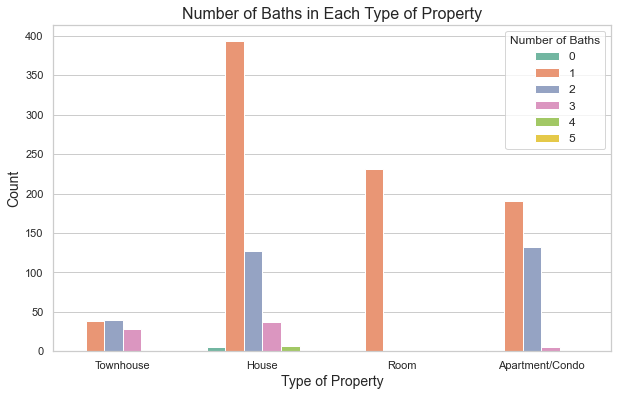

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a count plot of number of beds in each type of property
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Type', hue='nbeds', palette='Set2')

# set the labels and title
ax.set_xlabel('Type of Property', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Number of Beds in Each Type of Property', fontsize=16)

# add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Number of Beds', fontsize=12)

# display the plot
plt.show()

# create a count plot of number of baths in each type of property
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Type', hue='nbath', palette='Set2')

# set the labels and title
ax.set_xlabel('Type of Property', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Number of Baths in Each Type of Property', fontsize=16)

# add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Number of Baths', fontsize=12)

# display the plot
plt.show()

This plot displays the number of bedrooms and bathrooms for each type of property.

## Correlation between variables

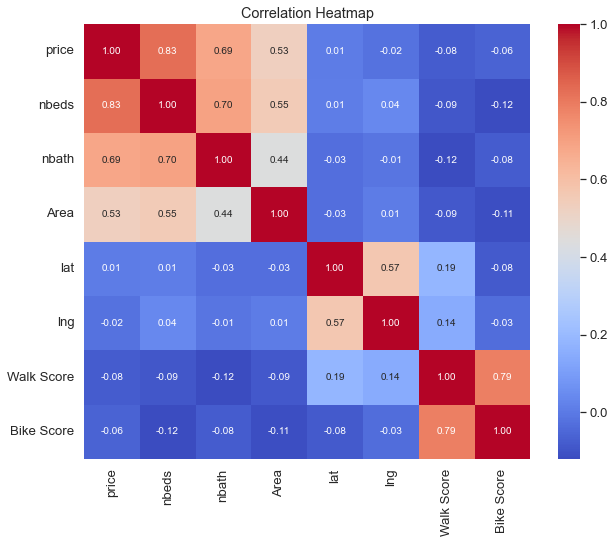

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

This plot displays a correlation matrix between various features and the price of a property. It appears that the number of bedrooms, number of bathrooms, and the area of the property have the highest correlation with price.

## Impact of Property Features on Price

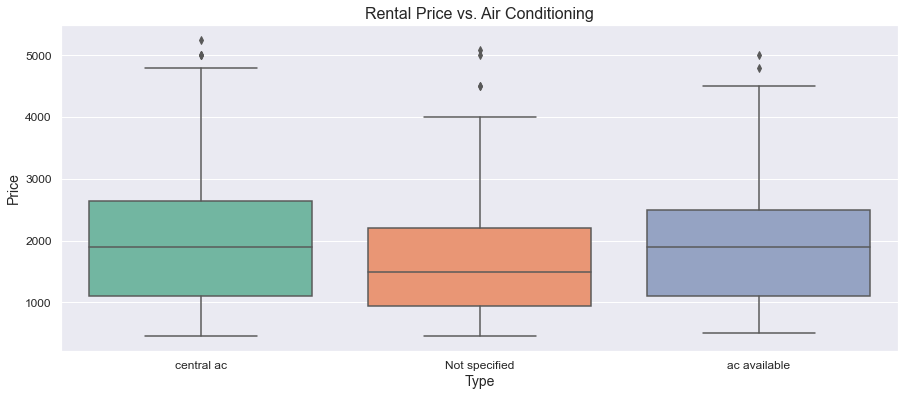

In [26]:
import seaborn as sns

# create a box plot of rental price vs. air conditioning
plt.figure(figsize=(15, 6))
sns.boxplot(x="air_conditioner", y="price", data=df, palette="Set2")
plt.title('Rental Price vs. Air Conditioning', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

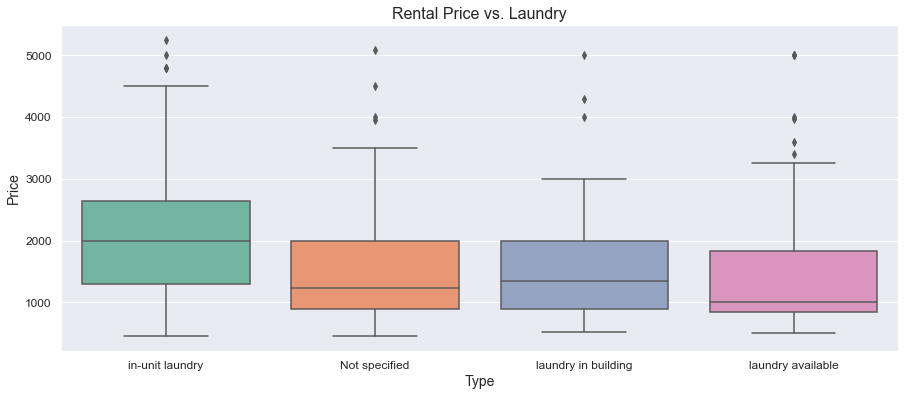

In [27]:
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.boxplot(x="laundry", y="price", data=df, palette="Set2")
plt.title('Rental Price vs. Laundry', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

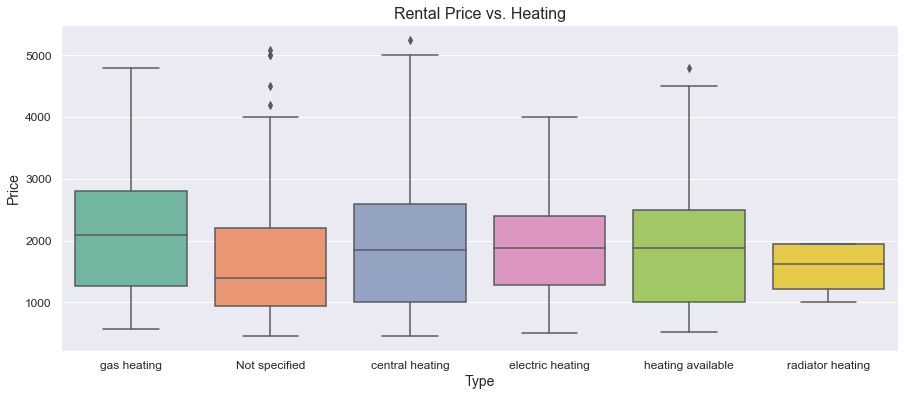

In [28]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="heating", y="price", data=df, palette="Set2")
plt.title('Rental Price vs. Heating', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

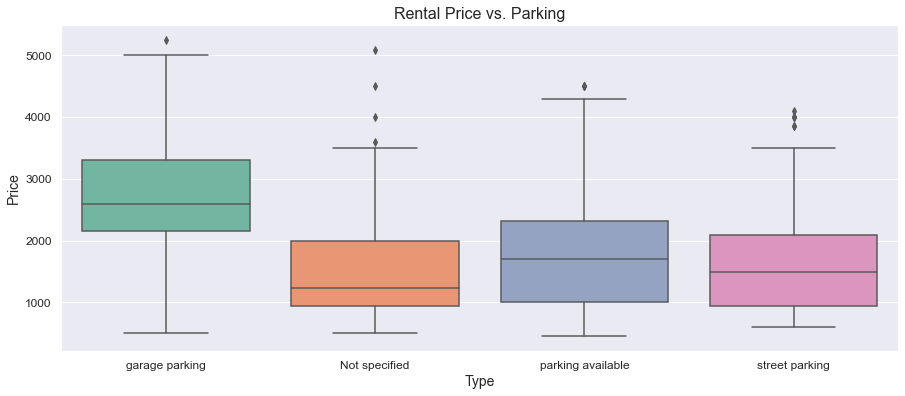

In [29]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="parking", y="price", data=df, palette="Set2")
plt.title('Rental Price vs. Parking', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

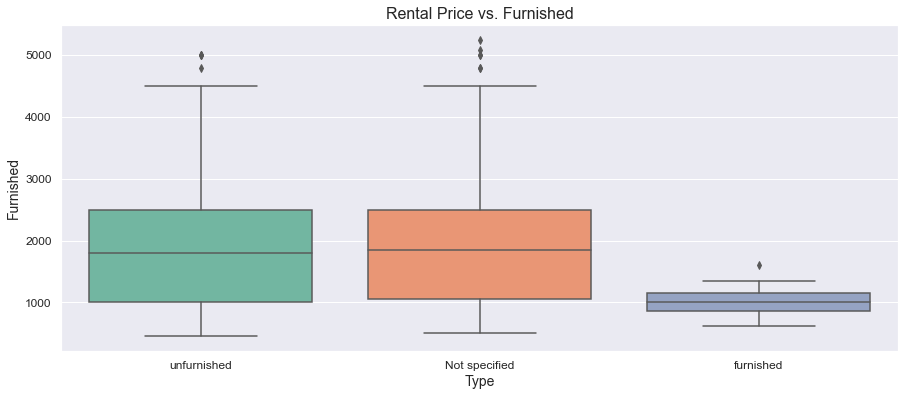

In [30]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="furnished", y="price", data=df, palette="Set2")
plt.title('Rental Price vs. Furnished', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Furnished', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

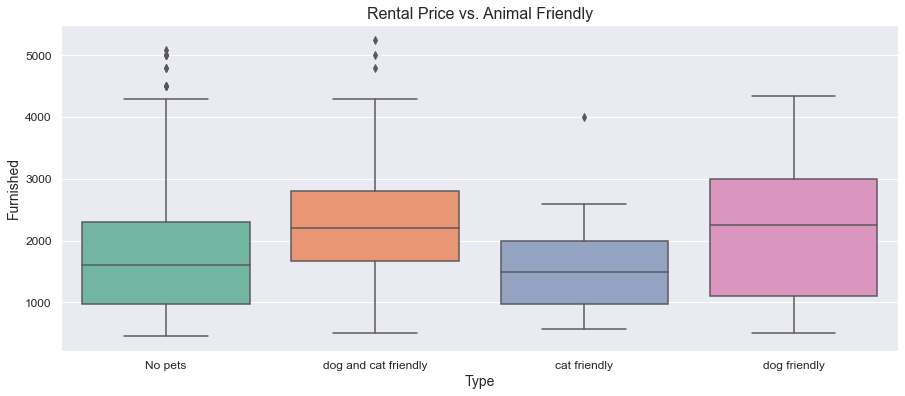

In [31]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="animal_friendly", y="price", data=df, palette="Set2")
plt.title('Rental Price vs. Animal Friendly', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Furnished', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Based on the analysis of the plots, it can be concluded that garage parking and in-unit laundry features have a significantly higher average price, and thus may be important predictors for property prices.

## Map

In [32]:
# Calculate average rental price by location
avg_price_by_location = df.groupby(['lat', 'lng']).agg({'price': 'mean'}).reset_index()

# Create map centered on the mean latitude and longitude
m = folium.Map(location=[avg_price_by_location['lat'].mean(), avg_price_by_location['lng'].mean()], zoom_start=12)

# Add marker cluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the map
for i, row in avg_price_by_location.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"${row['price']:.2f}",
        icon=folium.Icon(color='blue', icon='home'),
    ).add_to(marker_cluster)

# Display the map
m

## Summary